# Initialize a game

In [1]:
from ConnectN import ConnectN
grid_size = 6
win_size = 4
game_setting = {'size':(grid_size,grid_size), 'N':win_size, "pie_rule":True}
game = ConnectN(**game_setting)



<IPython.core.display.Javascript object>


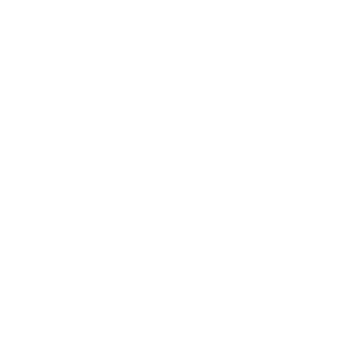

In [2]:
% matplotlib notebook

from Play import Play


gameplay=Play(ConnectN(**game_setting), 
              player1=None, 
              player2=None)


# Define our policy

Please go ahead and define your own policy! See if you can train it under 1000 games and with only 1000 steps of exploration in each move.

In [3]:
#Refer to Policy.py to see implementation details and network architecture
from Policy import Policy
policy = Policy(grid_size)

# Define a MCTS player for Play

In [4]:
import MCTS
from copy import copy


def Policy_Player_MCTS(game):
    mytree = MCTS.Node(copy(game))
    for _ in range(1000):
        mytree.explore(policy)
       
    mytreenext, (v, nn_v, p, nn_p) = mytree.next(temperature=0.1)
    
    return mytreenext.game.last_move

import random

def Random_Player(game):
    return random.choice(game.available_moves())    


# Play a game against a random policy

<IPython.core.display.Javascript object>


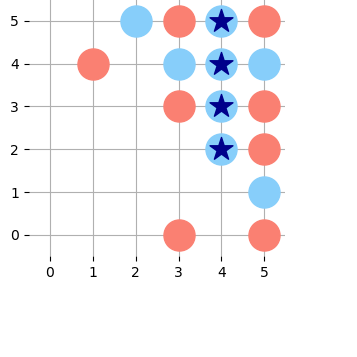

C:\Users\Hewitt\Documents\GitHub\Reinforcement-Learning\Alpha-Zero-TicTacToe\MCTS.py:68: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  return game.available_moves(), tinv(prob)[mask].view(-1), v.squeeze().squeeze()


In [5]:
% matplotlib notebook

from Play import Play


gameplay=Play(ConnectN(**game_setting), 
              player1=Policy_Player_MCTS, 
              player2=None)


# Training

Beware, training is **VERY VERY** slow!!

In [15]:
# train our agent
import MCTS
import numpy as np
import torch
# try a higher number
episodes = 1005

import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episodes).start()

outcomes = []
losses = []

Nmax = 1000

for e in range(episodes):
    
    mytree = MCTS.Node(game)
    vterm = []
    logterm = []
    
    while mytree.outcome is None:
        mytree, vterm, logterm = mytree.step(policy, vterm, logterm)
        
    outcome = mytree.outcome
    loss = policy.optimize(mytree,vterm,logterm)
    outcomes.append(outcome)
    losses.append(loss)
    
    
    if e%10==0:
        print("game: ",e+1, ", mean loss: {:3.2f}".format(np.mean(losses[-20:])),
              ", recent outcomes: ", outcomes[-10:])
    
    if e%500==0:
        torch.save(policy,'./policy/6-6-4-pie-{:d}.mypolicy'.format(e))
    del loss
    
    timer.update(e+1)
    
timer.finish()





C:\Users\Hewitt\Documents\GitHub\Reinforcement-Learning\Alpha-Zero-TicTacToe\MCTS.py:68: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  return game.available_moves(), tinv(prob)[mask].view(-1), v.squeeze().squeeze()
C:\Users\Hewitt\Anaconda3\envs\drlnd\lib\site-packages\torch\autograd\__init__.py:149: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ..\aten\src\ATen/native/IndexingUtils.h:30.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


game:  1 , mean loss: 0.36 , recent outcomes:  [-1]


game:  11 , mean loss: 0.22 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  21 , mean loss: 0.30 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  31 , mean loss: 0.33 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  41 , mean loss: 0.71 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  51 , mean loss: 0.65 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  61 , mean loss: 0.20 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  71 , mean loss: 0.25 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  81 , mean loss: 0.42 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  91 , mean loss: 0.39 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  101 , mean loss: 0.18 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  111 , mean loss: 0.56 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  121 , mean loss: 0.73 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  131 , mean loss: 0.71 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  141 , mean loss: 0.58 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  151 , mean loss: 0.45 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  161 , mean loss: 0.94 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  171 , mean loss: 0.74 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  181 , mean loss: 0.40 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  191 , mean loss: 0.86 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  201 , mean loss: 2.45 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  211 , mean loss: 3.55 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  221 , mean loss: 3.23 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  231 , mean loss: 2.18 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  241 , mean loss: 1.64 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  251 , mean loss: 1.59 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  261 , mean loss: 1.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  271 , mean loss: 1.19 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  281 , mean loss: 2.15 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  291 , mean loss: 1.58 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  301 , mean loss: 0.53 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  311 , mean loss: 0.78 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  321 , mean loss: 1.16 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  331 , mean loss: 1.16 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  341 , mean loss: 1.15 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  351 , mean loss: 0.98 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  361 , mean loss: 0.82 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  371 , mean loss: 1.07 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  381 , mean loss: 0.63 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  391 , mean loss: 0.17 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  401 , mean loss: 0.20 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  411 , mean loss: 0.22 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  421 , mean loss: 0.12 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  431 , mean loss: 0.39 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  441 , mean loss: 1.15 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  451 , mean loss: 1.24 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  461 , mean loss: 0.83 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  471 , mean loss: 0.99 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  481 , mean loss: 0.71 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  491 , mean loss: 0.20 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  501 , mean loss: 0.16 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  511 , mean loss: 0.12 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  521 , mean loss: 0.05 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  531 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  541 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  551 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  561 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  571 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  581 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  591 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  601 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  611 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  621 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  631 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  641 , mean loss: 0.05 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  651 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  661 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  671 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  681 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  691 , mean loss: 0.07 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  701 , mean loss: 0.07 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  711 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  721 , mean loss: 0.13 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  731 , mean loss: 0.13 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  741 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  751 , mean loss: 0.05 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  761 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  771 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  781 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  791 , mean loss: 0.01 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  801 , mean loss: 0.01 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  811 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  821 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  831 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  841 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  851 , mean loss: 0.02 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  861 , mean loss: 0.01 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  871 , mean loss: 0.03 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  881 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  891 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  901 , mean loss: 0.04 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  911 , mean loss: 0.32 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  921 , mean loss: 0.50 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  931 , mean loss: 0.71 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  941 , mean loss: 1.07 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  951 , mean loss: 1.12 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  961 , mean loss: 0.73 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  971 , mean loss: 0.93 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  981 , mean loss: 2.05 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  991 , mean loss: 1.56 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


game:  1001 , mean loss: 0.92 , recent outcomes:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


training loop: 100% |###########################################| Time: 0:06:19


# setup environment to pit your AI against the challenge policy '6-6-4-pie.policy'

In [32]:
challenge_policy = torch.load('./policy/6-6-4-pie-0.mypolicy')

def Challenge_Player_MCTS(game):
    mytree = MCTS.Node(copy(game))
    for _ in range(1000):
        mytree.explore(challenge_policy)
       
    mytreenext, (v, nn_v, p, nn_p) = mytree.next(temperature=0.1)
    
    return mytreenext.game.last_move



# Let the game begin!

<IPython.core.display.Javascript object>


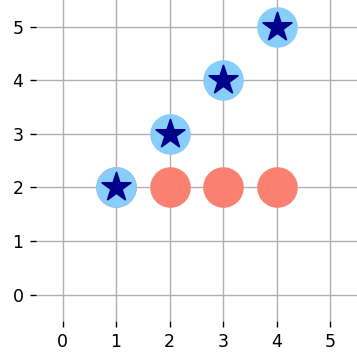

In [33]:
% matplotlib notebook
gameplay=Play(ConnectN(**game_setting), 
              player2=Challenge_Player_MCTS, 
              player1=Policy_Player_MCTS)